## Exercise 1: Implement the Logistic Function

In the following, implement the logistic function for binary classification.

/var/folders/xr/kt3mj1zd5q301hfqvry58zt5q2b8fk/T/ipykernel_674/3549831332.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


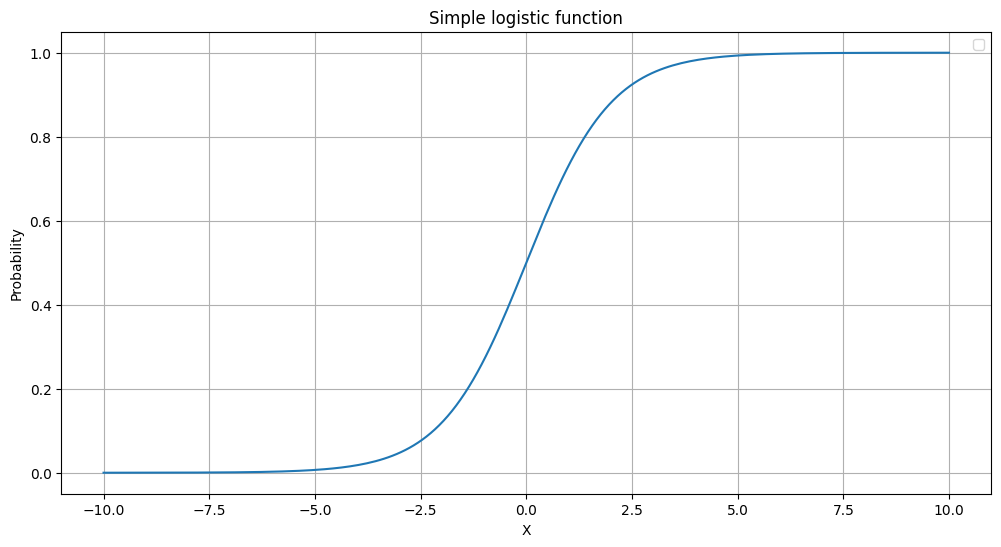

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_function(X):
    #YOUR CODE HERE
    return 1 / (1 + np.exp(-x))


# Graph 1: Modifying alpha (intercept term)
x = np.linspace(-10, 10, 200)  # Generate 200 points between -10 and 10
alphas = [-5, 0, 5]  # Different values of alpha to shift the curve

plt.figure(figsize=(12, 6))
plt.plot(x, logistic_function(x))
plt.title('Simple logistic function')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()


## Exercise 2: Create a Logistic Regression class

Use the logistic function above to derive the probabilities inside the `fit` function

In [10]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array
from sklearn.utils.multiclass import unique_labels

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class LogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.01, n_iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tolerance = tolerance
        self.coef_ = None
        self.intercept_ = None
        self.classes_ = None

    def fit(self, X, y):
        X, y = check_X_y(X, y, ensure_2d=True)
        self.classes_ = unique_labels(y)

        if len(self.classes_) != 2:
            raise ValueError("This Logistic Regression implementation only supports binary classification.")
        
        n_samples, n_features = X.shape

        # Initialize parameters
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0

        for _ in range(self.n_iterations):
            # Make predictions
            y_pred = self._predict_proba(X)

            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.coef_ -= self.learning_rate * dw
            self.intercept_ -= self.learning_rate * db

            # Check for convergence
            if np.all(np.abs(self.learning_rate * dw) < self.tolerance):
                break

        return self

    def _predict_proba(self, X):
        linear_pred = np.dot(X, self.coef_) + self.intercept_
        return sigmoid(linear_pred)

    def predict_proba(self, X):
        X = check_array(X, ensure_2d=True)
        return self._predict_proba(X)

    def predict(self, X):
        X = check_array(X, ensure_2d=True)
        probas = self._predict_proba(X)
        return np.where(probas >= 0.5, self.classes_[1], self.classes_[0])

    def _compute_loss(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    




## Exercise 3

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

# Load the Titanic dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic = pd.read_csv(url)

# Preprocessing
X = titanic[['Pclass', 'Sex', 'Age', 'Fare']]
y = titanic['Survived']

# Encode 'Sex' column
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# Create preprocessing pipeline
numeric_features = ['Age', 'Fare']
numeric_transformer = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create the full pipeline
pipeline = make_pipeline(preprocessor, LogisticRegression())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

/var/folders/xr/kt3mj1zd5q301hfqvry58zt5q2b8fk/T/ipykernel_68735/812491423.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})


### Step 1

Use the scikit-learn metrics library to manually calculate precision, recall, confusion matrix, and F1 score for our predictions.


In [12]:

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")



Precision: 0.6364
Recall: 0.1045
Confusion Matrix:
[[107   4]
 [ 60   7]]
F1 Score: 0.1795



### Step 2
Use cross_val_score to compute the F1 score using 5-fold cross-validation.


In [13]:

# Compute F1 score using 5-fold cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')

print("Cross-validation F1 scores:", cv_scores)
print(f"Mean F1 score: {cv_scores.mean():.4f}")
print(f"Standard deviation of F1 scores: {cv_scores.std():.4f}")



Cross-validation F1 scores: [0.14285714 0.45360825 0.29213483 0.28235294 0.26829268]
Mean F1 score: 0.2878
Standard deviation of F1 scores: 0.0989



### Step 3

Use cross_validate with a StratifiedKFold sampler to compute multiple metrics (accuracy, precision, recall, and F1 score) using 5-fold cross-validation.



In [14]:

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Perform cross-validation
cv_results = cross_validate(pipeline, X, y, cv=stratified_kfold, scoring=scoring)

# Print results
for metric, scores in cv_results.items():
    if metric.startswith('test_'):
        print(f"{metric[5:].capitalize()}:")
        print(f"  Mean: {scores.mean():.4f}")
        print(f"  Standard deviation: {scores.std():.4f}")



Accuracy:
  Mean: 0.6561
  Standard deviation: 0.0202
Precision:
  Mean: 0.6727
  Standard deviation: 0.0584
Recall:
  Mean: 0.2017
  Standard deviation: 0.0590
F1:
  Mean: 0.3077
  Standard deviation: 0.0750



### BONUS

If you finish early, try creating learning curves to visualize how the model's performance changes with increasing amounts of training data.
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


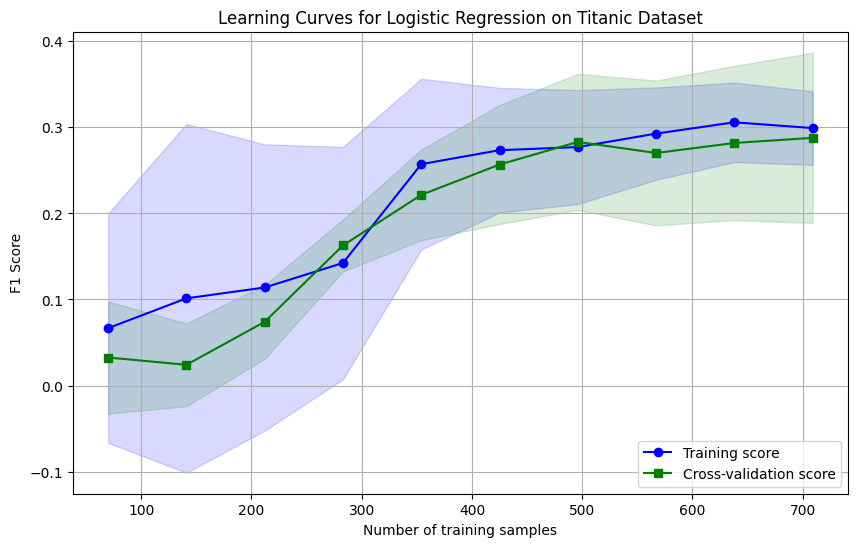

In [17]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='f1'
)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green', marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.xlabel('Number of training samples')
plt.ylabel('F1 Score')
plt.title('Learning Curves for Logistic Regression on Titanic Dataset')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Exercise 3: Implement Softmax

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(z):
    # Your code here
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Example of how softmax works
example_z = np.array([[1.0, 2.0, 0.5], [-1.0, 0.0, 3.0]])
example_softmax = softmax(example_z)
print("\nSoftmax example:")
print("Input:")
print(example_z)
print("Softmax output:")
print(example_softmax)
print("Sum of probabilities for each row:")
print(np.sum(example_softmax, axis=1))

## Exercise 4: Implement Multiple Logistic Regression

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array
from sklearn.preprocessing import LabelEncoder

def softmax(z):
    # Subtract max for numerical stability
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

class LogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.01, n_iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tolerance = tolerance
        self.coef_ = None
        self.intercept_ = None
        self.classes_ = None
        self.n_classes_ = None
        self.label_encoder = None

    def fit(self, X, y):
        X, y = check_X_y(X, y, ensure_2d=True)
        self.label_encoder = LabelEncoder()
        y_encoded = self.label_encoder.fit_transform(y)
        self.classes_ = self.label_encoder.classes_
        self.n_classes_ = len(self.classes_)

        n_samples, n_features = X.shape

        # Initialize parameters
        self.coef_ = np.zeros((self.n_classes_, n_features))
        self.intercept_ = np.zeros(self.n_classes_)

        # Convert y to one-hot encoding
        y_onehot = np.eye(self.n_classes_)[y_encoded]

        for _ in range(self.n_iterations):
            # Make predictions
            y_pred = self._predict_proba(X)

            # Calculate gradients
            error = y_pred - y_onehot
            dw = (1 / n_samples) * np.dot(X.T, error).T
            db = (1 / n_samples) * np.sum(error, axis=0)

            # Update parameters
            self.coef_ -= self.learning_rate * dw
            self.intercept_ -= self.learning_rate * db

            # Check for convergence
            if np.all(np.abs(self.learning_rate * dw) < self.tolerance):
                break

        return self

    def _predict_proba(self, X):
        linear_pred = np.dot(X, self.coef_.T) + self.intercept_
        return softmax(linear_pred)

    def predict_proba(self, X):
        X = check_array(X, ensure_2d=True)
        return self._predict_proba(X)

    def predict(self, X):
        X = check_array(X, ensure_2d=True)
        y_pred = np.argmax(self._predict_proba(X), axis=1)
        return self.label_encoder.inverse_transform(y_pred)

    def _compute_loss(self, y_true, y_pred):
        return -np.mean(np.sum(y_true * np.log(y_pred + 1e-10), axis=1))